<a href="https://colab.research.google.com/github/SrishtiK1112/Projects/blob/main/Password_Strength_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The datasets will be having a varioid passwords and their strength and our aim is to classify and predict the strength of the given password , either strong, weak or average

Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Preparation

Step 3: Data Visualization

Step 4:Data training

Step 5: Model Creation

Step 6: Performance Evaluation

Data Exploration

In [1]:
#  first we need to read the data from data.csv file, therefore we need to import the basic python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # we can also use matplotlib for visulaization purpose
import warnings  # to get rid of all the warnings that come across the cell, we import warnings
warnings.filterwarnings('ignore')

In [2]:
# READING THE DATASETS
data=pd.read_csv('/content/data[1].csv',on_bad_lines='skip')# The on_bad_lines='skip' parameter tells pd.read_csv to skip any lines that cause errors during parsing, effectively achieving the same result as the deprecated error_bad_lines=False.
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


Data Preparation

In [3]:
data.shape

(669640, 2)

In [4]:
#Checking the unique strength present in dataset, 0-poor, 1 for average, 2 for best
data['strength'].unique()

array([1, 2, 0])

In [5]:
# CHECKING ALL THE MISSING VALUES IN DATASET AND DROPPOING THEM ALL
data.isna().sum() # checking is there any Nan value in data, here only one value

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()] # finding the position where it is Nan

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True) # dropping that data

In [8]:
data.isnull().sum() # after dropping , checking if there is not any Nan value, here 0

password    0
strength    0
dtype: int64

Data Visualization

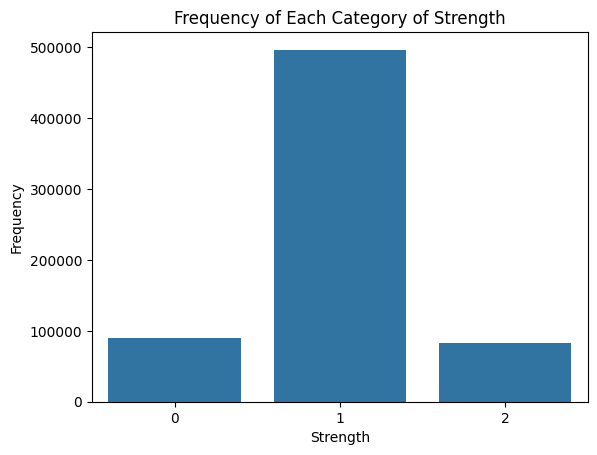

In [9]:
# Assuming `data` is your DataFrame and it has a column named 'strength'
sns.countplot(x='strength', data=data)

# Adding labels and title for better clarity
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category of Strength')

# Display the plot
plt.show()

In [10]:
# now we create an array containing all the data of the dataset
password_tuple=np.array(data) # converting the data into numpy array
password_tuple # printing the array

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
# shuffling the data to create the robustness
import random # therefore importing random
random.shuffle(password_tuple) # using shuffle function make the array shuffled
password_tuple # printing the array after shuffling

array([['kzde5577', 1],
       ['kino3434', 1],
       ['kino3434', 1],
       ...,
       ['M@tprestes1108', 2],
       ['RAMADAN12', 1],
       ['humi8111995', 1]], dtype=object)

In [12]:
# code for list comprehension
# first column is put in x list
# ans 2nd column in y list
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]

In [13]:
x # printing x list

['kzde5577',
 'kino3434',
 'kino3434',
 'kino3434',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 'visi7k1yr',
 'v1118714',
 'lamborghin1',
 'lamborghin1',
 'megzy123',
 'asv5o9yu',
 'jytifok873',
 'u6c8vhow',
 'visi7k1yr',
 'WUt9IZzE0OQ7PkNE',
 '52558000aaa',
 'AVYq1lDE4MgAZfNt',
 '612035180tok',
 'lamborghin1',
 'as326159',
 'intel1',
 'kzde5577',
 '52558000aaa',
 'u6c8vhow',
 'visi7k1yr',
 'elyass15@ajilent-ci',
 'kino3434',
 'u6c8vhow',
 'as326159',
 'intel1',
 '612035180tok',
 'prisonbreak1',
 'asv5o9yu',
 'asgaliu11',
 'u6c8vhow',
 'intel1',
 'klara-tershina3H',
 'faranumar91',
 'AVYq1lDE4MgAZfNt',
 'trabajonet9',
 'v1118714',
 'prisonbreak1',
 'gaymaids1',
 'jytifok873',
 'jerusalem393',
 'yqugu927',
 'klara-tershina3H',
 'intel1',
 'lsdlsd1',
 'asv5o9yu',
 'schalke04',
 'gaymaids1',
 'fahad123',
 'g067057895',
 'u6c8vhow',
 'megzy123',
 'yitbos77',
 'yqugu927',
 'as326159',
 'megzy123',
 'idofo673',
 'klara-tershina3H',
 'visi7k1yr',
 'patri1973',
 'khmer100.03278&?><Mnb',
 'czuodhj972',


In [14]:
y # printing y list

[1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,


In [15]:
# NOW WE NEED TO APPLY TF-IDF(TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY) OF DATA
# creating a custom function to split the word into characters
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [16]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [17]:
# now we import TF-IDF vectorizer to convert String data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char) # we tokenize the data on the basis of word_divide_char functon

In [19]:
# apply TF-IDF vectorizer on data, x(all passwords)
X=vectorizer.fit_transform(x)

In [20]:
X.shape # second column size increased because it is now vector

(669639, 131)

In [21]:
vectorizer.get_feature_names_out() # getting all the features of our data

array(['\x01', '\x05', '\x08', '\x0f', '\x11', '\x12', '\x13', '\x16',
       '\x17', '\x19', '\x1b', '\x1c', '\x1d', '\x1e', ' ', '!', '"', '#',
       '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@',
       '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81',
       '\x8d', '¡', '¦', '¨', '«', '¯', '°', '±', '²', '³', '´', 'µ', '·',
       'º', '¼', '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'ç',
       'ê', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ú',
       'û', 'ü', 'ý', 'þ', 'ÿ', 'œ', '—', '‚', '‹', '›'], dtype=object)

In [22]:
first_document_vector=X[0]
first_document_vector

<1x131 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56691304],
        [0.        ],
        [0.59149342],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [24]:
# now we need to prepare the data for modelling purpose with first column as feature, and second column as the importance of that feature
# this is final data for modelling purpose
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False) # arranged the data in decreaing order of TF-IDF

,TF-IDF
7,0.591493
5,0.566913
z,0.336368
k,0.291717
d,0.285712
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


Data Training

In [25]:
# now we need to pass this data for modelling purpose (Applying Machine Learning)
# first we need to split the data for training and testing purpose
# train - To learn the relationship within data,
# test - To do predictions, and this testing data will be unseen to my model
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2) # using train_test_split, we splitted the data, train - 80% of data, test - 20% of data

In [27]:
X_train.shape

(535711, 131)

Model Creation

1. Logistic Regression

In [28]:
# now after splitting our data is ready for modelling stuff
from sklearn.linear_model import LogisticRegression

In [29]:
clf=LogisticRegression(random_state=0,multi_class='multinomial') # we consider case of multinomial logistic regression, because we have three types of password - 0,1,2

In [30]:
clf.fit(X_train,y_train) # fitting our data

LogisticRegression(multi_class='multinomial', random_state=0)

In [31]:
# now we have trained our data, so we consider some rare case which is not in data, and predicts its strength
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred) # returned 1 there fore password is of average strength

array([1])

In [32]:
# same way we can do prediction on X test data, In the same we can also consider some of the advanced classifier, such as adabboost, catboost, randomforest
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [34]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

lr_accuracy= accuracy_score(y_test,y_pred)
print("\n Logistic Regression Accuracy=", lr_accuracy)

print("\n Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[ 5342 12569    16]
 [ 3857 92909  2624]
 [   42  5027 11542]]

 Logistic Regression Accuracy= 0.8197912311092528

 Classification Report
              precision    recall  f1-score   support

           0       0.58      0.30      0.39     17927
           1       0.84      0.93      0.89     99390
           2       0.81      0.69      0.75     16611

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



2. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=0)

In [37]:
# Fit the model
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
# now we have trained our data, so we consider some rare case which is not in data, and predicts its strength
dt_dt=np.array(['%@123abcd'])
pred_dt=vectorizer.transform(dt_dt)
tree_clf.predict(pred_dt)

array([2])

In [39]:
# same way we can do prediction on X test data, In the same we can also consider some of the advanced classifier, such as adabboost, catboost, randomforest
y_pred_dt=tree_clf.predict(X_test)
y_pred_dt

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
#Evaluate the model
cm_dt=confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix")
print(cm_dt)

dt_accuracy= accuracy_score(y_test,y_pred_dt)
print("\n Decision Tree Accuracy=", dt_accuracy)

print("\n Classification Report")
print(classification_report(y_test,y_pred_dt))

Confusion Matrix
[[16784  1061    82]
 [  889 97800   701]
 [  110   680 15821]]

 Decision Tree Accuracy= 0.9736948210979034

 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     17927
           1       0.98      0.98      0.98     99390
           2       0.95      0.95      0.95     16611

    accuracy                           0.97    133928
   macro avg       0.96      0.96      0.96    133928
weighted avg       0.97      0.97      0.97    133928



3. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=0, n_estimators=10)

In [43]:
# Fit the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [44]:
# Predict the test set results
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
#Evaluate the model
cm_rf=confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix")
print(cm_rf)

rf_accuracy= accuracy_score(y_test,y_pred_rf)
print("\n Decision Tree Accuracy=", rf_accuracy)

print("\n Classification Report")
print(classification_report(y_test,y_pred_rf))

Confusion Matrix
[[16825  1095     7]
 [  517 98646   227]
 [   38   725 15848]]

 Decision Tree Accuracy= 0.9805193835493698

 Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     17927
           1       0.98      0.99      0.99     99390
           2       0.99      0.95      0.97     16611

    accuracy                           0.98    133928
   macro avg       0.98      0.96      0.97    133928
weighted avg       0.98      0.98      0.98    133928



4. Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC

In [29]:
# Initialize the Support Vector Classifier
svm_clf = SVC(kernel='linear', random_state=0)

In [ ]:
# Fit the model
svm_clf.fit(X_train, y_train)

In [ ]:
# Predict the test set results
y_pred_svm = svm_clf.predict(X_test)
y_pred_svm

In [ ]:
# Evaluate the model
print("Confusion Matrix - SVM")
print(confusion_matrix(y_test, y_pred_svm))

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("\nSVM Accuracy:", svm_accuracy)

print("\nClassification Report - SVM")
print(classification_report(y_test, y_pred_svm))